### Project 4 EDA

The following is EDA for Project 4 for Rhys Morgan, as per the project brief. EDA is focused on determining preparation required for Singtel customer data, as well as general characteristics that will help in feature selection. Please see comments and notes below cells (in markup) for objectives of each cell.

#### Key findings and next steps

Need to fill in later

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import csv

%matplotlib inline

TELDATA = r"https://raw.githubusercontent.com/RhysZH/GA-DAT9-Projects1/master/R_Morgan_Project4_Files/Telecom_Data_SingTel.csv"

df= pd.read_csv(TELDATA)
df.head()

,State,Account Length,Area Code,Phone Number,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df.rename(columns={'total_night_calls_':'total_night_calls','total_intl__calls':'total_intl_calls', 'number_customer_service_calls_':'number_customer_service_calls'}, inplace = True)

df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
international_plan                object
voice_mail_plan                   object
num_of_voice_mail_messages         int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_international_minutes      float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [4]:
df.shape

(5000, 21)

In [5]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,num_of_voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_international_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
num_of_voice_mail_messages       0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_international_minutes      0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
#upon conversion, all features are object types. We need to rectify this to allow calculations
df.describe()

,account_length,area_code,num_of_voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_international_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
#give columns clearer names
#df.rename(columns={'housing':'has_housing_loan','loan':'has_personal_loan','contact':'contact_method','month':'last_comm_month','day_of_week':'last_comm_weekday','duration':'last_comm_duration','campaign':'contacts_during_campaign','pdays':'prev_camp_days_passed','previous':'num_prev_contacts','poutcome':'prev_camp_outcome','emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','euribor3m':'euribor_3m','nr.employed':'num_employed','y':'converted'}, inplace=True)
#df.head()

In [9]:
#no nulls in data
df.corr()

,account_length,area_code,num_of_voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_international_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.018054,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445
area_code,-0.018054,1.000000,-0.003399,-0.019118,-0.019314,-0.019119,0.007098,-0.012300,0.007114,0.002084,0.014657,0.002070,-0.004154,-0.013623,-0.004219,0.020921
num_of_voice_mail_messages,-0.014575,-0.003399,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,-0.001017,-0.019118,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.028240,-0.019314,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739
total_day_charge,-0.001019,-0.019119,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,-0.009591,0.007098,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,0.009143,-0.012300,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,-0.009587,0.007114,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836
total_night_minutes,0.000668,0.002084,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655,-0.008533


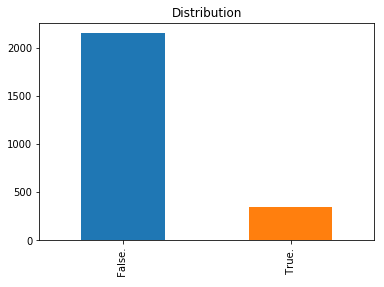

In [10]:
dg = df.loc[df['area_code']==415]
subs_dist = dg['churn'].value_counts()
subs_dist.plot.bar(x = 'churn', title='Distribution')

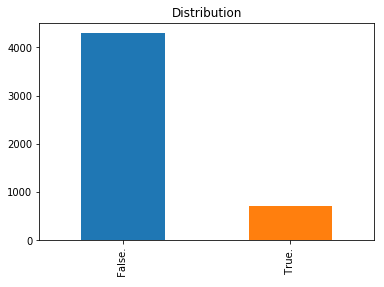

In [11]:
#check target distribution - quite imbalanced
subs_dist = df['churn'].value_counts()
subs_dist.plot.bar(x = 'churn', title='Distribution')

In [12]:
#select all integer-type features for comparison
#ind_predictors = ['emp_var_rate','cons_price_idx','cons_conf_idx','euribor_3m','num_employed']               
#dg = df[ind_predictors]
#sns.pairplot(df)

In [13]:
df.corr()

,account_length,area_code,num_of_voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_international_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.018054,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445
area_code,-0.018054,1.000000,-0.003399,-0.019118,-0.019314,-0.019119,0.007098,-0.012300,0.007114,0.002084,0.014657,0.002070,-0.004154,-0.013623,-0.004219,0.020921
num_of_voice_mail_messages,-0.014575,-0.003399,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,-0.001017,-0.019118,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.028240,-0.019314,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739
total_day_charge,-0.001019,-0.019119,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,-0.009591,0.007098,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,0.009143,-0.012300,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,-0.009587,0.007114,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836
total_night_minutes,0.000668,0.002084,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655,-0.008533


'emp_var_rate' correlates with all metrics here except confidence index. Many of these metrics correlate with each other, so further feature selection will have to be done.

In [14]:
#select all integer-type features for comparison
#predictors = ['age','last_comm_duration','contacts_during_campaign','prev_camp_days_passed','num_prev_contacts']
#dl = df[predictors]
#sns.pairplot(dl)

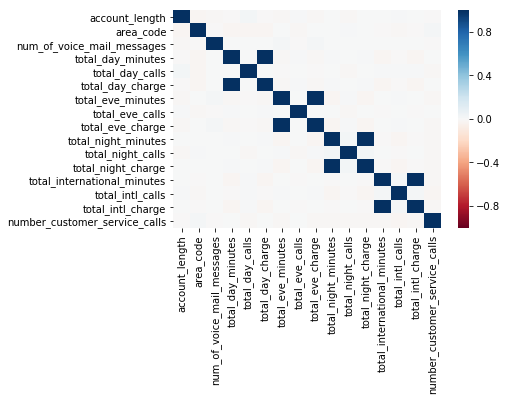

In [15]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,cmap='RdBu')

1. Correlation between charges and minutes at different times during the day.

In [16]:
df.describe(include='all')

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,num_of_voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_international_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,5000,5000.00000,5000.000000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,51,NaN,NaN,5000,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,422-8152,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,158,NaN,NaN,1,4527,3677,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4293
mean,NaN,100.25860,436.911400,NaN,NaN,NaN,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,NaN
std,NaN,39.69456,42.209182,NaN,NaN,NaN,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,NaN
min,NaN,1.00000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.00000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.00000,415.000000,NaN,NaN,NaN,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.00000,415.000000,NaN,NaN,NaN,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


1. Data is unbalanced, with roughly 10% of instances converting.

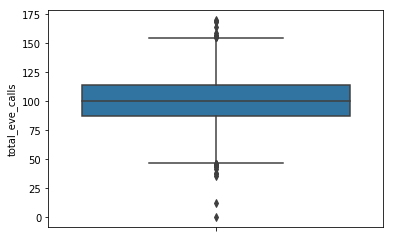

In [17]:
sns.boxplot(y=df['total_eve_calls'])

In [18]:
#
df.nunique()

state                              51
account_length                    218
area_code                           3
phone_number                     5000
international_plan                  2
voice_mail_plan                     2
num_of_voice_mail_messages         48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_international_minutes       170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
dtype: int64

1.'education', 'default','has_housing_loan','has_personal_loan',and 'prev_camp_outcome' can be converted to ordinal values. Unsure regarding education, the last comm month and weekday. Other categorical features will need dummy variables via 'get_dummies' for classification modelling.

1. created maps for ordinal features, then assigned features to desired maps. Some of the columns share categories (yes, no, unknown).
2. Other categorical features will have to be converted to dummy variables.

In [19]:
print(set(df['international_plan']))

{' yes', ' no'}


In [20]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
num_of_voice_mail_messages       0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_international_minutes      0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [21]:
#function to get standard deviation of feature
def telecom_std(col1):
    print(df[col1].std())
    
telecom_std('total_day_calls')

19.831197415138462


In [22]:
pivot_items = pd.pivot_table(df, values='area_code', index=['churn'], aggfunc=np.sum)
pivot_items

,area_code
churn,
False.,1874911
True.,309646


In [23]:
conversion_map = {' False.':0,' True.':1}
yn_map = {' no':'0',' yes':'1'}
df['international_plan_n'] = df['international_plan'].map(yn_map)
df['voice_mail_plan_n'] = df['voice_mail_plan'].map(yn_map)
df['area_code'] = df.area_code.astype(str)
df['international_plan_n'] = df.international_plan_n.astype(int)
df['voice_mail_plan_n'] = df.voice_mail_plan_n.astype(int)
df = pd.get_dummies(df, columns=['area_code'])
df['churn_n'] = df['churn'].map(conversion_map)
df.drop(['state','phone_number','international_plan','voice_mail_plan','churn'],axis=1, inplace=True)
         #'total_international_minutes','total_day_minutes','total_eve_minutes',
         #'total_night_minutes'],axis=1, inplace=True)
df.dtypes

account_length                     int64
num_of_voice_mail_messages         int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_international_minutes      float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
international_plan_n               int64
voice_mail_plan_n                  int64
area_code_408                      uint8
area_code_415                      uint8
area_code_510                      uint8
churn_n                            int64
dtype: object

In [24]:
feature_names = ['account_length','num_of_voice_mail_messages','total_day_minutes','total_day_calls','total_day_charge',
                 'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge',
                 'total_international_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls','international_plan_n',
                 'voice_mail_plan_n','area_code_408','area_code_415','area_code_510']

X = df[feature_names]
y = df['churn_n']

X.shape

(5000, 20)

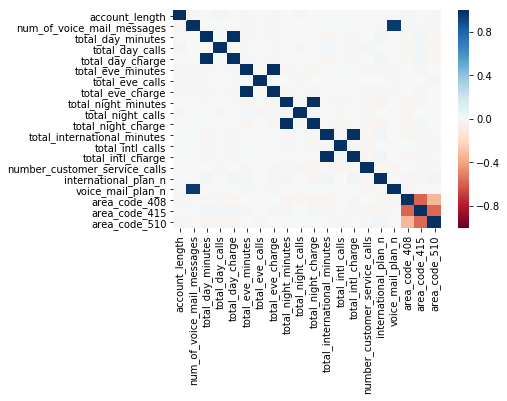

In [25]:
sns.heatmap(X.corr(),vmin=-1,vmax=1,center=0,cmap='RdBu')

In [26]:
#df.drop("phone_number", axis=1, inplace=True)

In [27]:
from feature_selector import FeatureSelector

fs = FeatureSelector(data = X, labels = y)

fs.identify_missing(missing_threshold=0.6)
missing_features = fs.ops['missing']
missing_features[:10]

0 features with greater than 0.60 missing values.



/Users/meisan/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


[]

In [28]:
fs.identify_collinear(correlation_threshold=0.7)
correlated_features = fs.ops['collinear']
correlated_features[:5]

5 features with a correlation magnitude greater than 0.70.



['total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_charge',
 'voice_mail_plan_n']

In [29]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[84]	valid_0's auc: 0.945989	valid_0's binary_logloss: 0.12409
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[55]	valid_0's auc: 0.928853	valid_0's binary_logloss: 0.13338
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.944398	valid_0's binary_logloss: 0.193041
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[60]	valid_0's auc: 0.886827	valid_0's binary_logloss: 0.169376
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[87]	valid_0's auc: 0.920472	valid_0's binary_logloss: 0.157782
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[63]	valid_0's auc: 0.900628	valid_0's binary_logloss: 0.169

In [30]:
fs.identify_low_importance(cumulative_importance = 0.99)
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

15 features required for cumulative importance of 0.99 after one hot encoding.
5 features do not contribute to cumulative importance of 0.99.



['area_code_415',
 'area_code_408',
 'area_code_510',
 'total_intl_charge',
 'total_day_charge']

#### Converted cleaned dataset to csv

In [31]:
#converted to csv for easy importing into modelling notebook. The code below is commented to avoid creating a new file.
#df.to_csv(r"/Users/meisan/Documents/GitHub/GA-DAT9-Projects1/R_Morgan_Project4_Files/telecom_data.csv", sep="," )